# Birthday Problem

In [25]:
using StatsBase, Combinatorics, Plots
pyplot()

Plots.PyPlotBackend()

In [26]:
matchExists1(n) = 1 - prod([k/365 for k in 365:-1:365-n+1])

matchExists1 (generic function with 1 method)

In [27]:
matchExists2(n) = 1- factorial(365,365-big(n))/365^big(n)

matchExists2 (generic function with 1 method)

In [28]:
function bdEvent(n)
    birthdays = rand(1:365,n)
    dayCounts = counts(birthdays, 1:365)
    return maximum(dayCounts) > 1
end

bdEvent (generic function with 1 method)

In [29]:
probEst(n) = sum([bdEvent(n) for _ in 1:N])/N

probEst (generic function with 1 method)

In [30]:
xGrid = 1:50

1:50

In [31]:
analyticSolution1 = [matchExists1(n) for n in xGrid]

50-element Array{Float64,1}:
 0.0                 
 0.002739726027397249
 0.008204165884781345
 0.016355912466550215
 0.02713557369979347 
 0.040462483649111425
 0.056235703095975365
 0.07433529235166902 
 0.09462383388916673 
 0.11694817771107768 
 0.14114137832173312 
 0.1670247888380645  
 0.19441027523242949 
 ⋮                   
 0.878219664366722   
 0.891231809817949   
 0.9031516114817354  
 0.9140304715618692  
 0.9239228556561199  
 0.9328853685514263  
 0.940975899465775   
 0.9482528433672548  
 0.9547744028332994  
 0.9605979728794225  
 0.9657796093226765  
 0.9703735795779884  

In [32]:
analyticSolution2 = [matchExists2(n) for n in xGrid]

50-element Array{BigFloat,1}:
 0.0                                                                                
 0.002739726027397260273972602739726027397260273972602739726027397260273972602739347
 0.008204165884781384875211109026083693000562957402889848001501219741039594670671175
 0.01635591246655030499952444237655423798959942624615376705902312752398995416652893 
 0.02713557369979358932829677725461939702532984349277126002275986037304211905237107 
 0.04046248364911148536489545153880269295648970865040453043340698557341140509275298 
 0.05623570309597540615341771808884977197638302850820609979614550087905395733780662 
 0.07433529235166902850116039198851566676039760056421310610142490223205840199160008 
 0.0946238338891666936299020820271235425574299819217098051457772331420406835917809  
 0.1169481777110776518691647704154958387683426672989827140599909452015520092018471  
 0.1411413783217330586672698451986329390760593065510653794282103713604135979908355  
 0.16702478883806439114579048000086

In [33]:
println(
    "Maximum error: $(maximum(abs.(analyticSolution1 - analyticSolution2)))")

Maximum error: 2.461172365062727820892938546467205715971256384764337390231064159958270652057059e-16


In [34]:
N = 10^4

10000

In [35]:
mcEstimates = [probEst(n) for n in xGrid]

50-element Array{Float64,1}:
 0.0   
 0.0033
 0.0074
 0.0153
 0.0262
 0.0384
 0.0584
 0.0731
 0.0949
 0.1213
 0.1404
 0.1644
 0.1931
 ⋮     
 0.8758
 0.8953
 0.9033
 0.9157
 0.9303
 0.9316
 0.9375
 0.9475
 0.9544
 0.9603
 0.9664
 0.9673

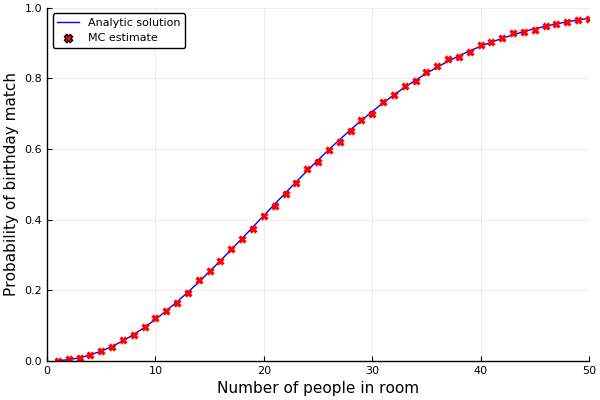

In [36]:
plot(xGrid, analyticSolution1, c=:blue, label="Analytic solution")
scatter!(xGrid, mcEstimates, c=:red, ms=6, msw=0, shape=:xcross, 
    label="MC estimate", xlims=(0,50), ylims=(0, 1), 
    xlabel="Number of people in room", 
    ylabel="Probability of birthday match", 
    legend=:topleft)